# Série 1 - Problème 4 - Python

On desire résoudre les deux équations différentielles ci-dessous:

$B = 1 - \frac{x}{0.7990}$

$A = 4 \cdot (1 - 0.5 \cdot B)$

$\frac{dx}{dt} = -\frac{2kx^2 y}{A^3}$ avec $x_{0}=0.7990$

$\frac{dx}{dt} = -\frac{kx^2 y}{A^3}$ avec $y_{0}=0.7990$

$\frac{dx}{dt} = \frac{kx^2 y}{A^3}$ avec $z_{0}=0.7990$

La constante k vaut 10.

## Solution

On commence par importer les bibliothèques nécessaires à la résolution du problème:
- le solveur odeint (dans scipy.integrate)
- numpy (pour le travail avec les matrices/vecteurs et les constantes mathématiques)
- pylab (pour l'affichage sur un graphique)

In [1]:
from scipy.integrate import odeint
import numpy as np 
import matplotlib.pylab as plt

On définit ensuite nos constantes

In [2]:
# Constantes

k = 10

# Conditions initiales
x0 = 0.7990
y0 = 0.7990
z0 = 0

Les équations différentielles sont définie dans une fonction:

In [3]:
def equations(variables, t, k):
    # On commence par récupérer les variables dans le bon ordre
    x, y, z = variables
  
    # On définit B comme dans la donnée
    B = 1 - x / 0.7990
    
    # On définit A comme dans la donnée
    A = 4 * (1 - 0.5 * B)
        
    # On définit les équations différencielles dans le bon ordre
    dx = - k * x * x * y / (A * A * A) # On peut écrire x**2 pour mettre à la puissance
    dy = - k * x**2 * y / A**3
    dz = k * x**2 * y / A**3
    
    # On retourne les équations différence sous la forme d'un vecteur
    return [dx, dy, dz]

Résoudre le problème à l'aide du solveur d'équations différentielles

In [4]:
 # Définir les conditions initiales et le domaine d'intégration
variables0 = [x0, y0, z0]
t = np.linspace(0, 1000, 1001) 


In [5]:
# On appelle solveur qui fait le travail de résolution pour nous
valeurs = odeint(equations, variables0, t, (k,))

Une fois que le problème est résolu, on peut faire de l'affichage

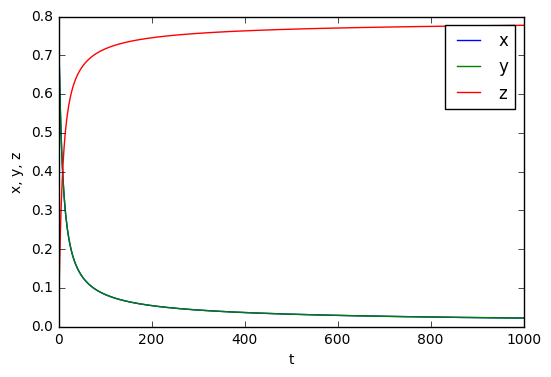

In [6]:
plt.figure(1, figsize=(6, 4), dpi=100)
plt.plot(t, valeurs)
plt.xlabel('t')
plt.ylabel('x, y, z')
plt.legend (['x','y','z'])
